## Import Libraries and Files

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [4]:
# Import Files
bike = pd.read_pickle(r'../Data/Prepared/bike_flag.pkl')

## Visualisations

In [121]:
# Define theme
sns.set_theme(style='white', palette='Greens_r')

In [13]:
# Define top 20 starting stations
top = bike.groupby('start_station')['ride_id'].count().reset_index()

In [17]:
top20 = top.nlargest(20, 'ride_id')

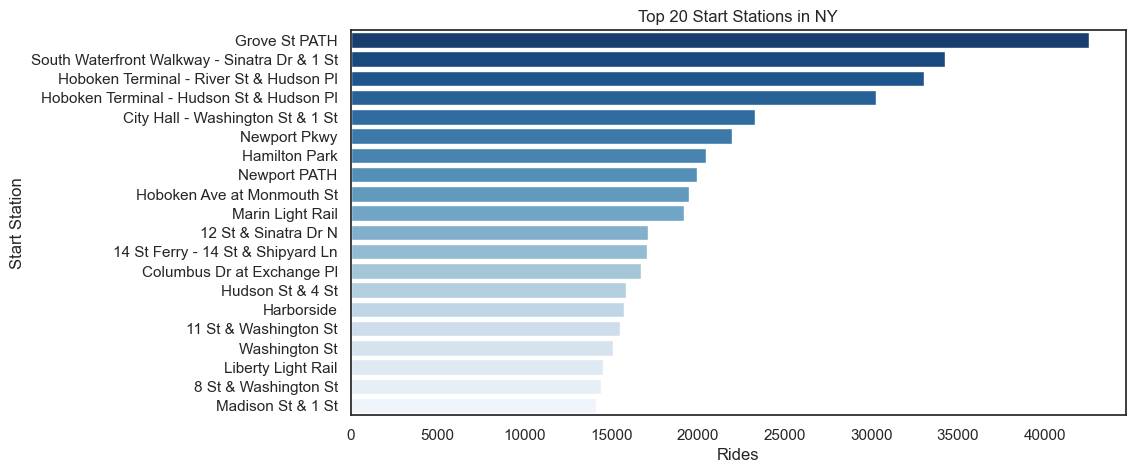

In [109]:
# Plot Bar Chart
plt.figure(figsize=(10,5)) 
with sns.color_palette(palette='Blues_r', n_colors=len(top20)):
    sns.barplot(data=top20, x='ride_id', y='start_station', hue='start_station', palette=sns.color_palette(palette='Blues_r', n_colors=len(top20)))
plt.title('Top 20 Start Stations in NY') # Set title
plt.xlabel('Rides') # Set x label
plt.ylabel('Start Station') # Set y label
# Show plot
plt.show()

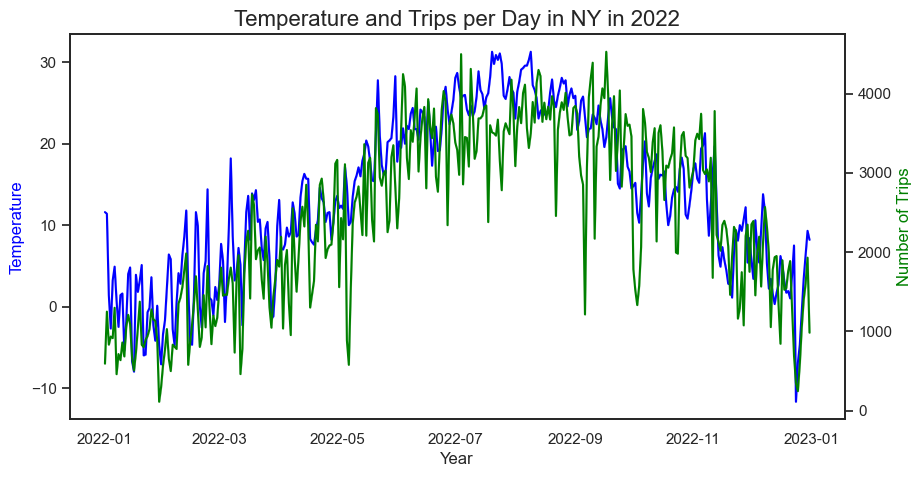

In [111]:
# Plot dual axis of temperature and trips per day
fig, ax = plt.subplots(figsize=(10,5)) # Set figure and axes
sns.lineplot(data=bike['avg_temp'], color='blue') 

ax.set_xlabel('Year', fontsize=12) # Set x label
ax.set_ylabel('Temperature', fontsize=12, color='blue') # Set y label
ax2 = ax.twinx()
sns.lineplot(data=bike['trips_per_day'], color='green', ax=ax2)
ax2.set_xlabel('Year', fontsize=12) # Set x label for ax2
ax2.set_ylabel('Number of Trips', fontsize=12, color='green') # Set y label for ax2
# Set title
plt.title('Temperature and Trips per Day in NY in 2022', fontsize=16)
# Show plot
plt.show()

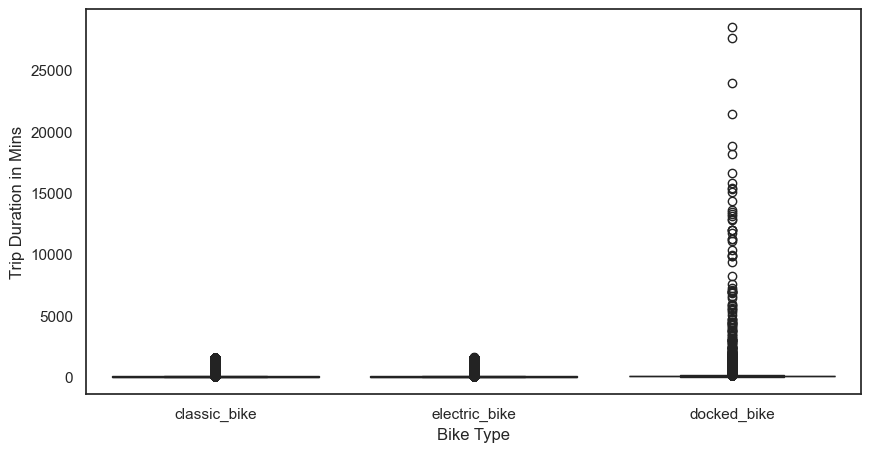

In [131]:
# Plot bike type with Box Plot
plt.figure(figsize=(10, 5)) # Set figure
sns.boxplot(data=bike, x='bike_type', y='trip_mins')
plt.xlabel('Bike Type') # Set x label
plt.ylabel('Trip Duration in Mins') # Set y label
# Show plot
plt.show()

This boxplot compares the distribution of trip durations (in minutes) for three types of bikes: classic bikes, electric bikes, and docked bikes. Most trip durations across all bike types are tightly clustered near the lower end, as indicated by the short whiskers and dense presence of data near the bottom of the y-axis. However, there are significant outliers for docked bikes, with trip durations extending up to over 25,000 minutes, suggesting occasional anomalies or errors in trip recording for this category or maybe technical issues with the docks. Classic and electric bikes show a more consistent range of trip durations with fewer extreme values. 

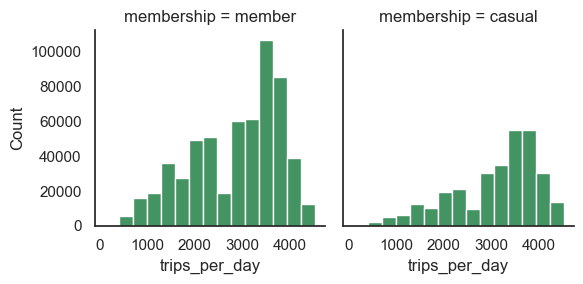

In [154]:
# Plot number of trips per day with membership comparison
grid = sns.FacetGrid(bike, col='membership')
grid.map(sns.histplot, 'trips_per_day', bins=15)
plt.show()

This histograms show the distribution of trips per day for two membership types: members and casual users. Members tend to have a higher count of trips overall, as indicated by the larger frequency values across all bins, while casual users show lower counts. The use of FacetGrids helps separate the analysis by membership type, making it easier to compare usage patterns and identify distinct trends within each group without overlapping distributions.